# Material for the chapter: Discrete-Time Approach

In [1]:
%matplotlib inline
import internal_script
import dorion_francois.dfbook as df # path utils (etc.) for the book

from dorion_francois.binomial_tree import *

### Figure 1 of the chapter

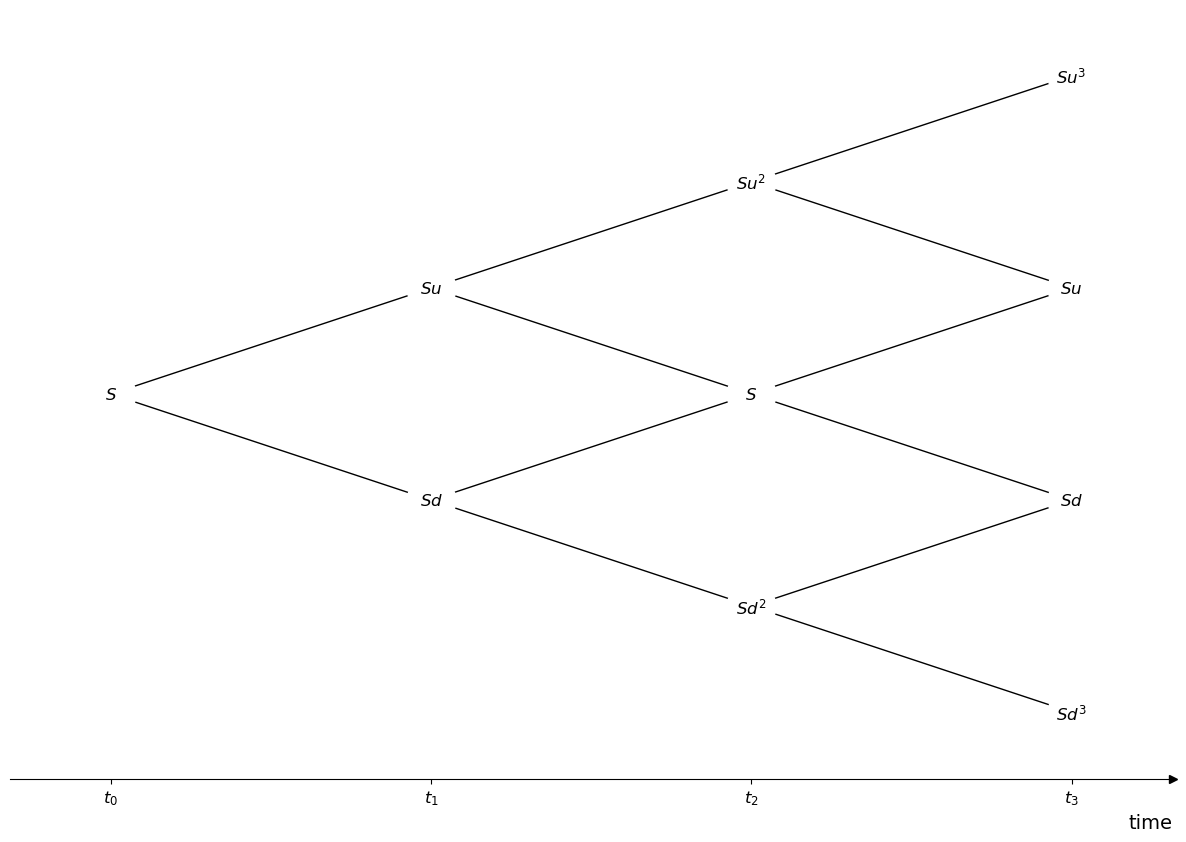

In [2]:
asset = AssetCRR(3)
asset.draw_tree(values='S');
df.savefig('discrete_time','fig_ua_dynamics.pdf')

### Figure 2 of the chapter

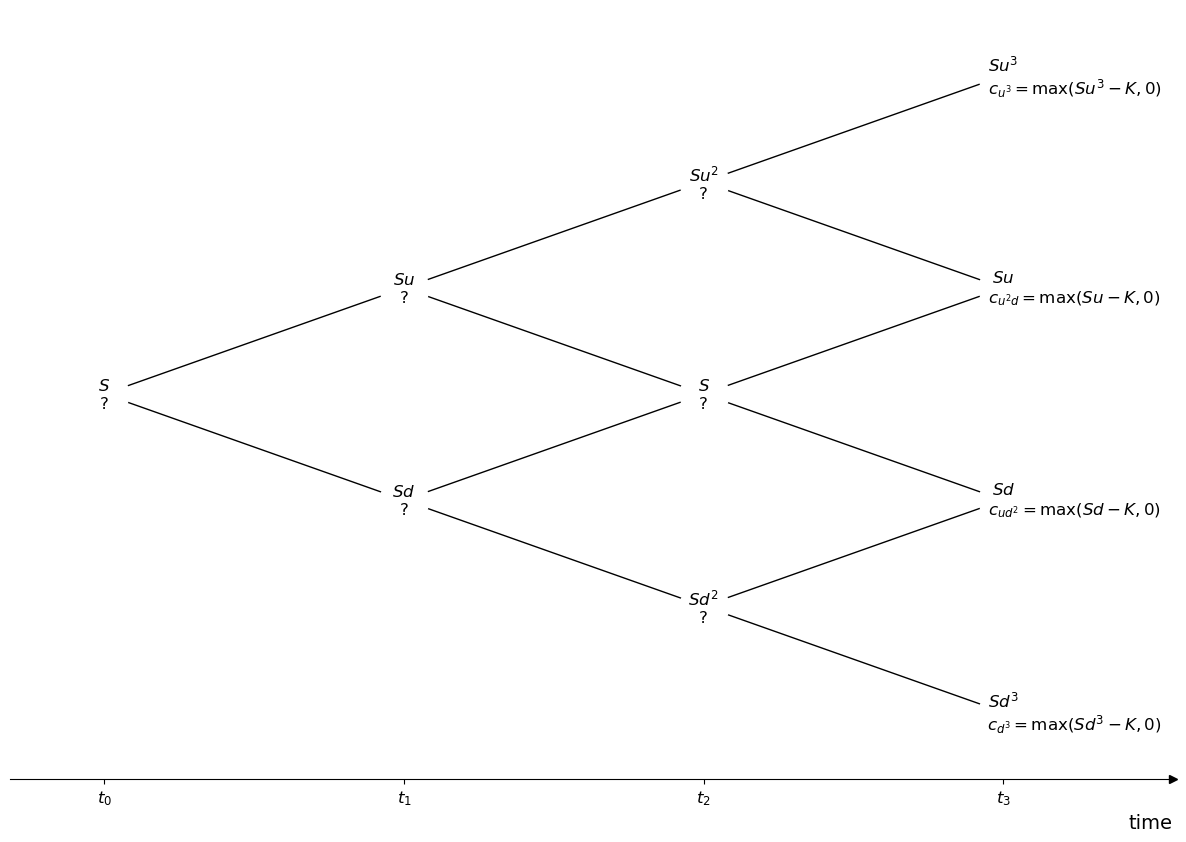

In [3]:
asset = CallPayoff(3)
fig, ax = asset.draw_tree(values=['S','c'])
df.savefig('discrete_time','fig_call_payoff.pdf')

### Figure 3 of the chapter (the elements of)

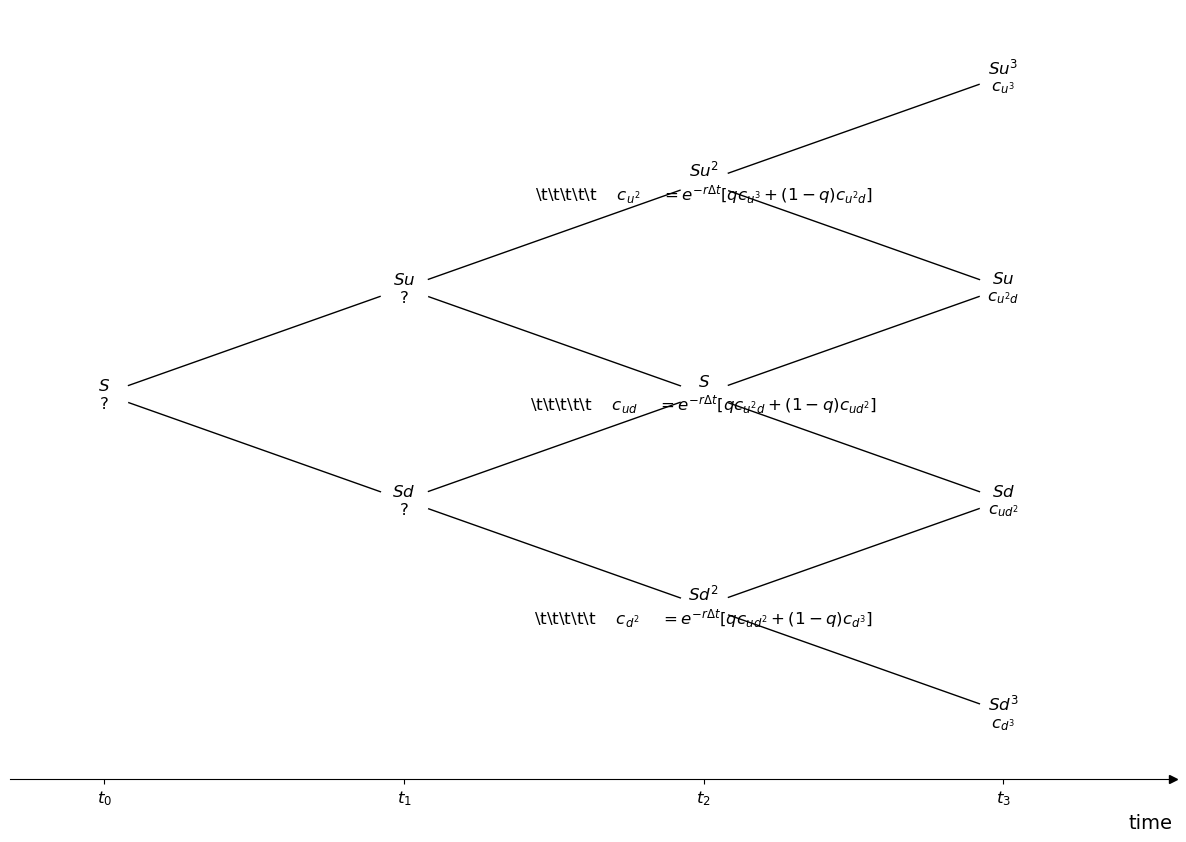

In [4]:
asset = CallTminus(3,1)
asset.draw_tree(values=['S','c']);
df.savefig('discrete_time','fig_call_Tm1.pdf')

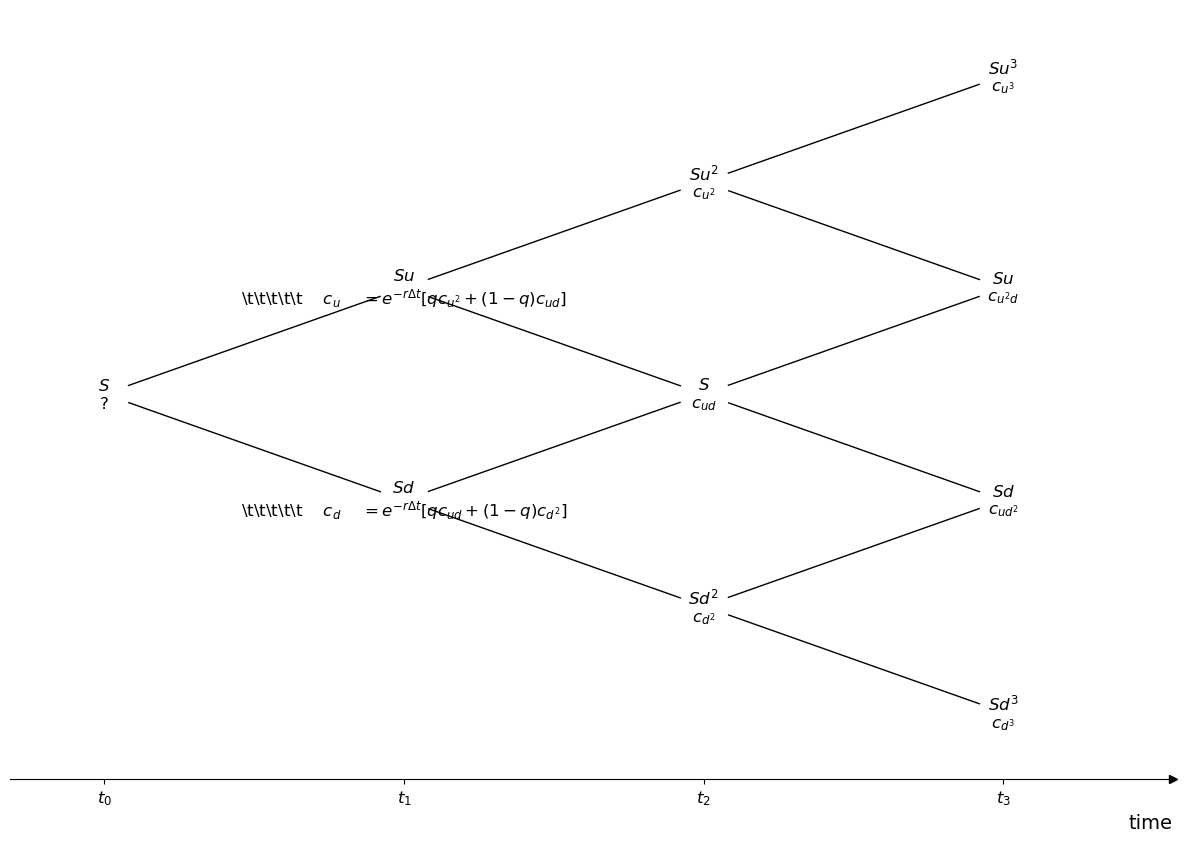

In [5]:
asset = CallTminus(3,2)
asset.draw_tree(values=['S','c']);
df.savefig('discrete_time','fig_call_Tm2.pdf')

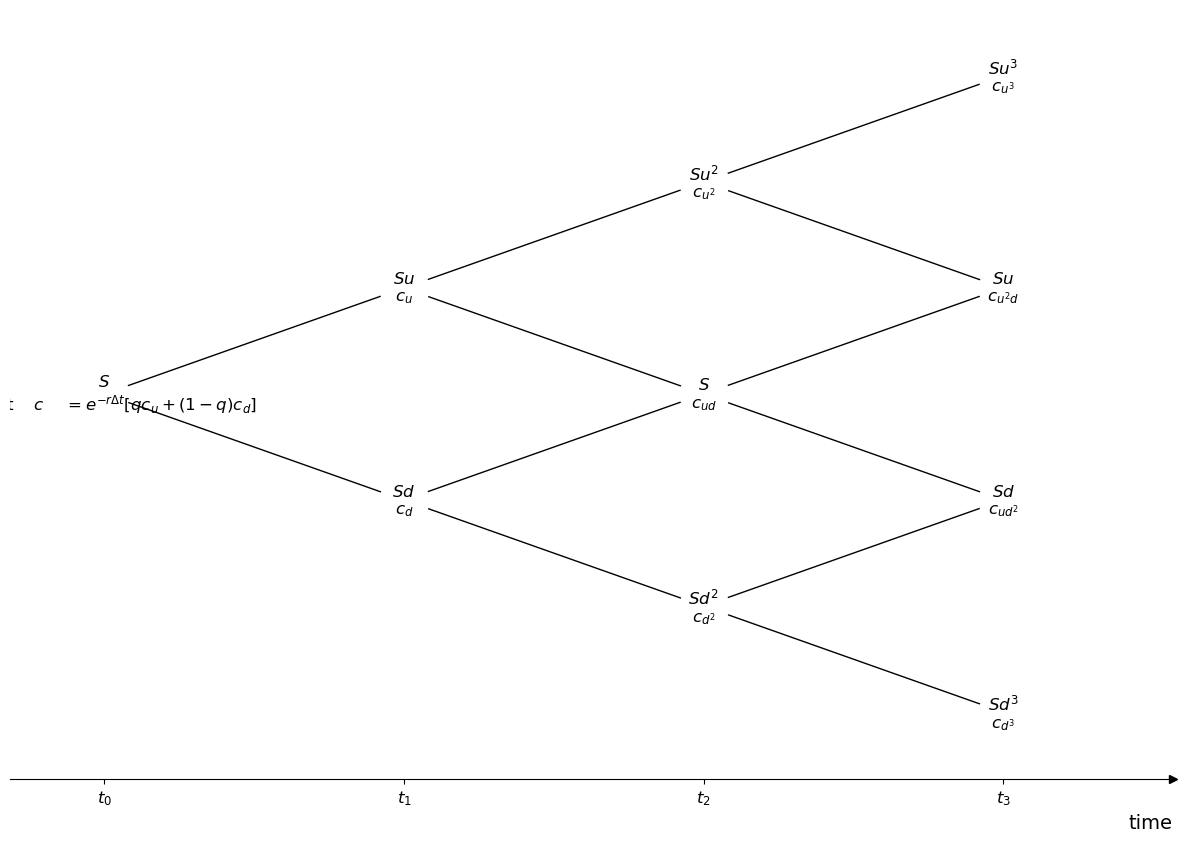

In [6]:
asset = CallTminus(3,3)
asset.draw_tree(values=['S','c']);
df.savefig('discrete_time','fig_call_Tm3.pdf')

### Figure 4 of the chapter

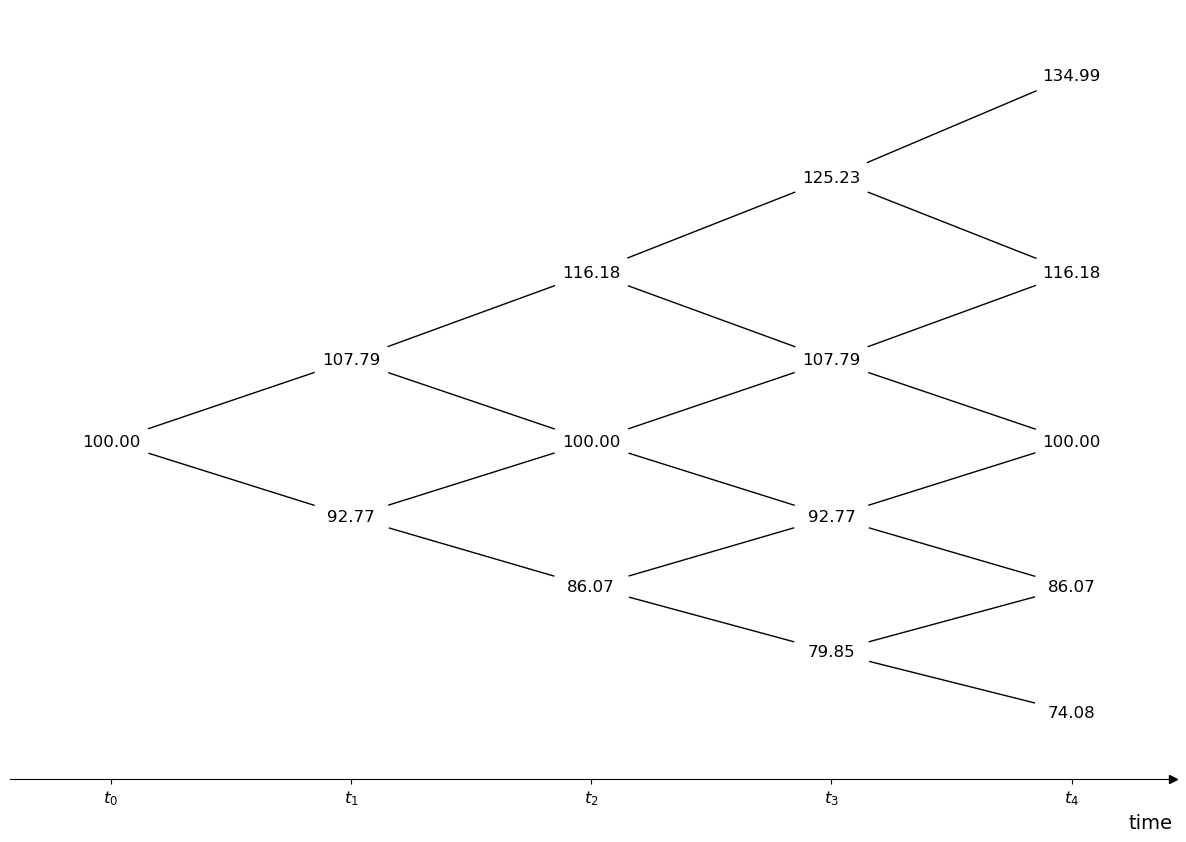

In [7]:
asset = AssetCRR(4, 100,0.05,0,3/12,0.3)
put, Put, do_x, _ = asset.option_price(102, is_call=False)
asset.draw_tree(values=asset.values, value_fmt='%.2f', node_size=3000);
df.savefig('discrete_time','fig_ua_dynamics_ex.pdf')

### Figure 5 of the chapter

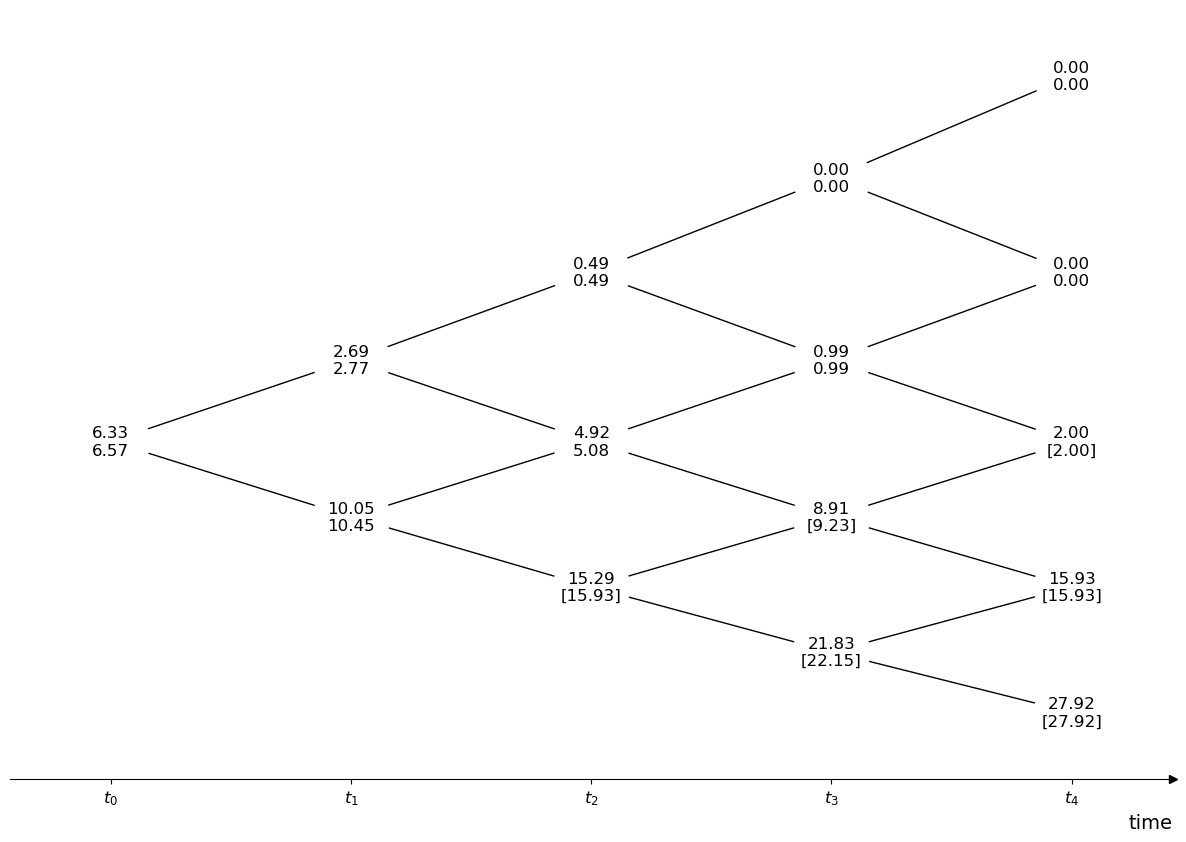

In [8]:
value_node_label = AssetCRR.value_node_label
def value_node_label_ex(self, tn, jj, values, fmt):
    lbl = value_node_label(self,tn,jj,values,fmt)
    if do_x[tn,jj]:
        lbl = lbl.replace('\n','\n[')+']'
    return lbl

AssetCRR.value_node_label = value_node_label_ex    
asset.draw_tree(values=[put,Put], value_fmt='%.2f', node_size=3000);
AssetCRR.value_node_label = value_node_label
df.savefig('discrete_time','fig_puts_values.pdf')

### Figure XX of the chapter (next iteration)

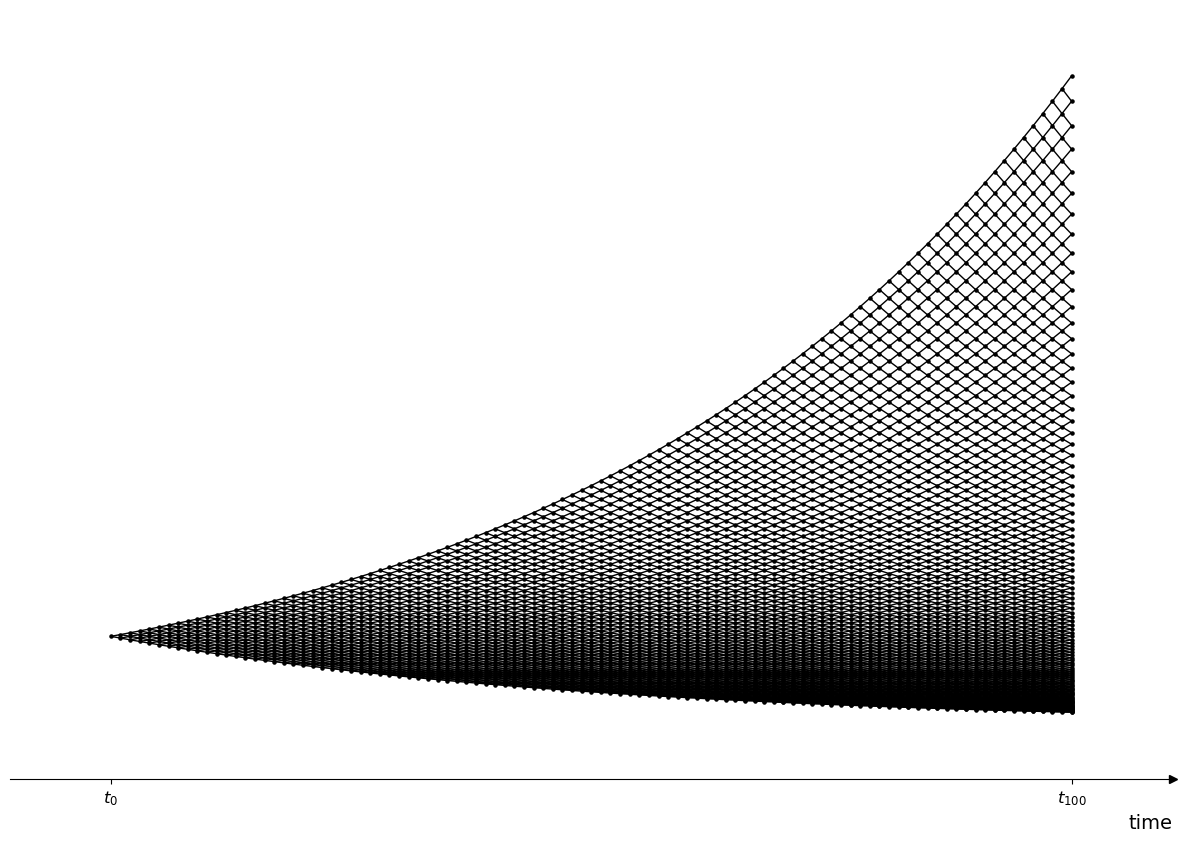

In [9]:
asset = AssetCRR(100, 100,0.05,0,1,0.2)
asset.draw_tree(node_size=5, node_color='k', time_steps=[0,100]);
df.savefig('discrete_time','fig_tree_100.pdf')

### Figure 6 of the chapter

In [10]:
S = 100
K = 80
r = 0.05
y = 0
T = 1
sigma = 0.2
is_call = True

import dorion_francois.binomial_tree as crr
n_steps = np.arange(2,500)
bin_price = np.nan*n_steps
for N in n_steps:
    _,call,_,_,_ = crr.option_price(S, K, r, y, T, sigma, 
                                    N, is_call, bms_adj=False)
    bin_price[N-2] = call[0,0]

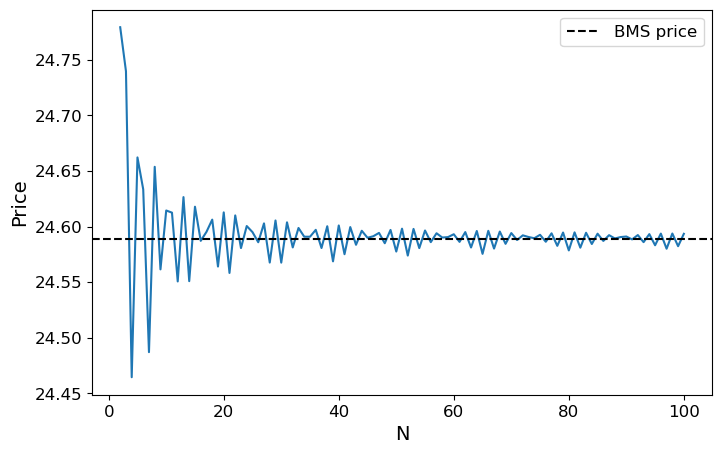

In [11]:
# Big picture: the oscillatory convergence
fig, ax  = plt.subplots(1, 1, figsize=(8,5))
ax.plot(n_steps[:99], bin_price[:99])
ax.axhline(bms.option_price(S,K,r,y,T,sigma,is_call), linestyle='--', color='k', label='BMS price')
ax.set_xlabel('N')
ax.set_ylabel('Price')
ax.legend()
df.savefig('discrete_time','fig_convergence_100.pdf')

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/v5/6b8_dxhs1dv0xjszn9nd4c8m0000gn/T/ipykernel_9047/1258898696.py:7: SyntaxWarning: invalid escape sequence '\p'
  ax.axhline(bms_price-bps/1e4, linestyle=':', color='k', label='BMS $\pm$ %dbps'%bps)


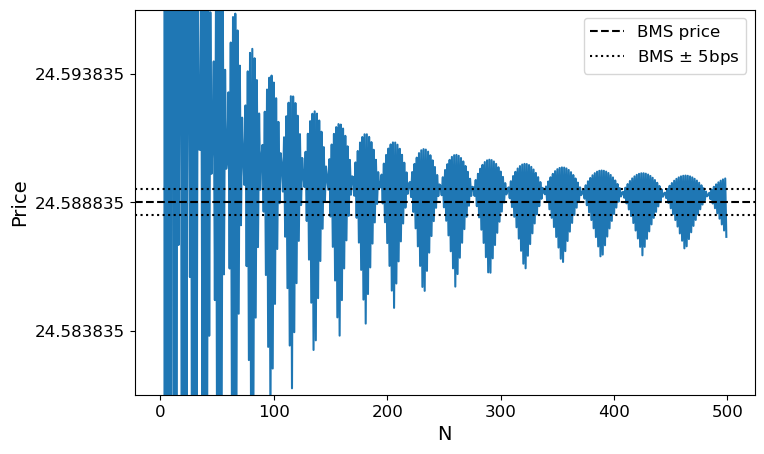

In [12]:
# Further zooming on the convergence
bms_price = bms.option_price(S,K,r,y,T,sigma,is_call)
def plot_convergence(n_steps, prices, bps=5):
    fig, ax  = plt.subplots(1, 1, figsize=(8,5))
    ax.plot(n_steps, prices)
    ax.axhline(bms_price, linestyle='--', color='k', label='BMS price')
    ax.axhline(bms_price-bps/1e4, linestyle=':', color='k', label='BMS $\pm$ %dbps'%bps)
    ax.axhline(bms_price+bps/1e4, linestyle=':', color='k')
    ax.set_xlabel('N')
    ax.set_ylabel('Price')
    ax.legend()
    
    off = 10*bps/1e4
    ax.set_yticks([bms_price-off,bms_price,bms_price+off])
    ax.set_ylim([bms_price-1.5*off,bms_price+1.5*off])
plot_convergence(n_steps, bin_price)
df.savefig('discrete_time','fig_convergence_500.pdf')

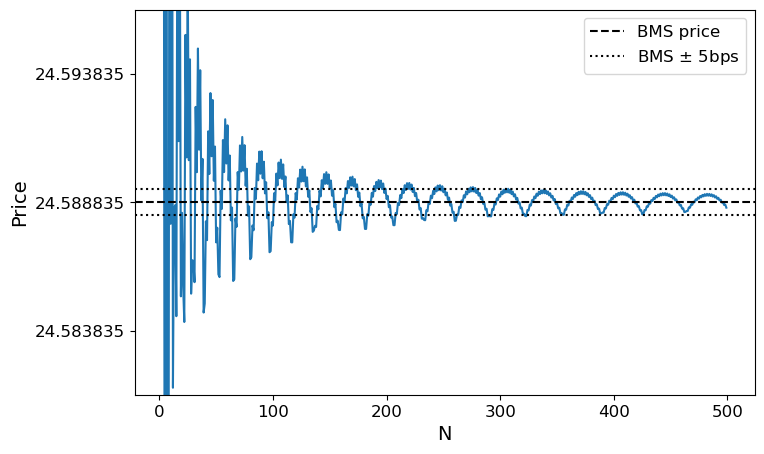

In [13]:
# Exploiting the oscillatory convergence
mid_price = (bin_price[:-1]+bin_price[1:])*0.5
plot_convergence(n_steps[1:], mid_price)
df.savefig('discrete_time','fig_convergence_midprice.pdf')

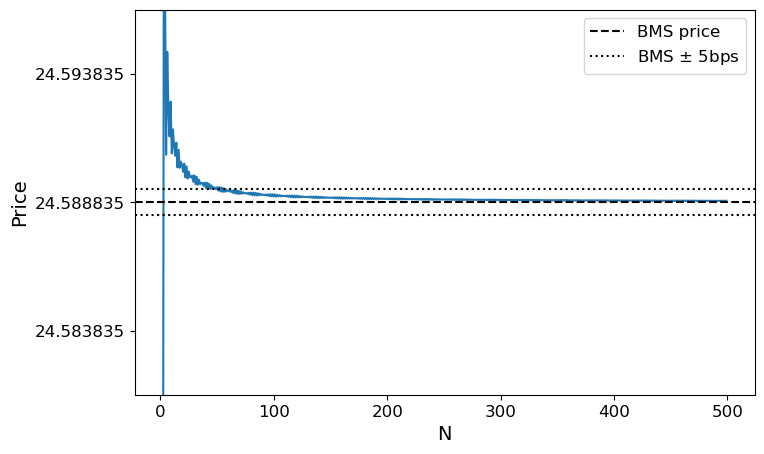

In [14]:
# Using the Broadie & Detemple adjustment
bin_price_adj = np.nan*n_steps
for N in n_steps:
    _,call,_,_,_ = crr.option_price(S, K, r, y, T, sigma, 
                                    N, is_call, bms_adj=True)
    bin_price_adj[N-2] = call[0,0]
plot_convergence(n_steps, bin_price_adj)
df.savefig('discrete_time','fig_convergence_bmsadj.pdf')

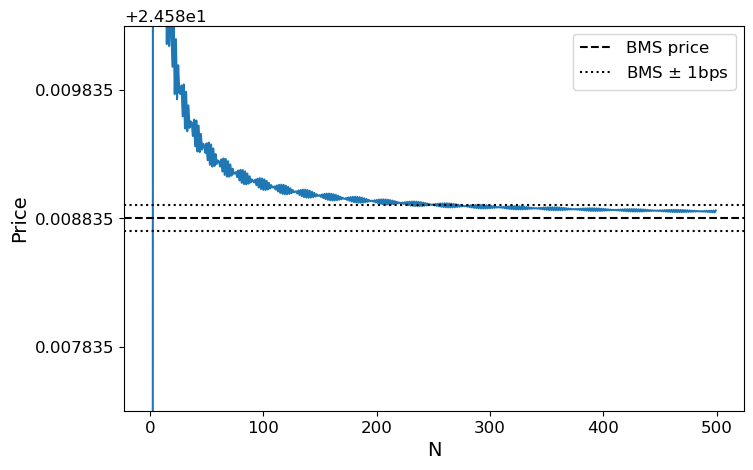

In [15]:
# Further zooming on the convergence
plot_convergence(n_steps, bin_price_adj, 1)
df.savefig('discrete_time','fig_convergence_bmsadj_zoom.pdf')

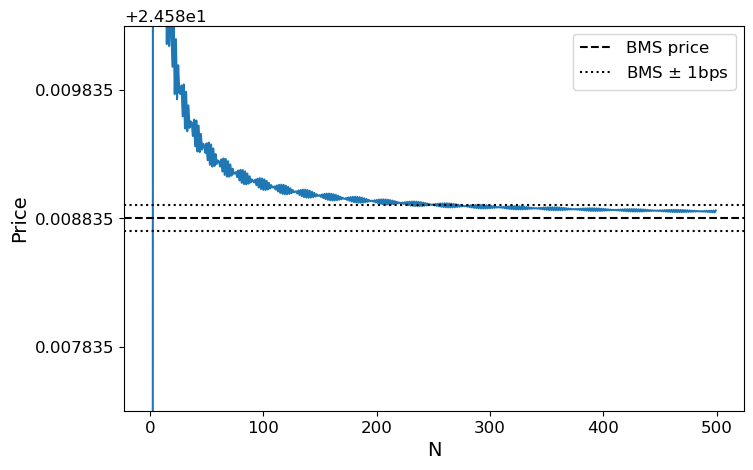

In [16]:
# Not helping anymore
mid_price_adj = (bin_price_adj[:-1]+bin_price_adj[1:])*0.5
plot_convergence(n_steps, bin_price_adj, 1)
df.savefig('discrete_time','fig_convergence_midpriceadj_zoom.pdf')

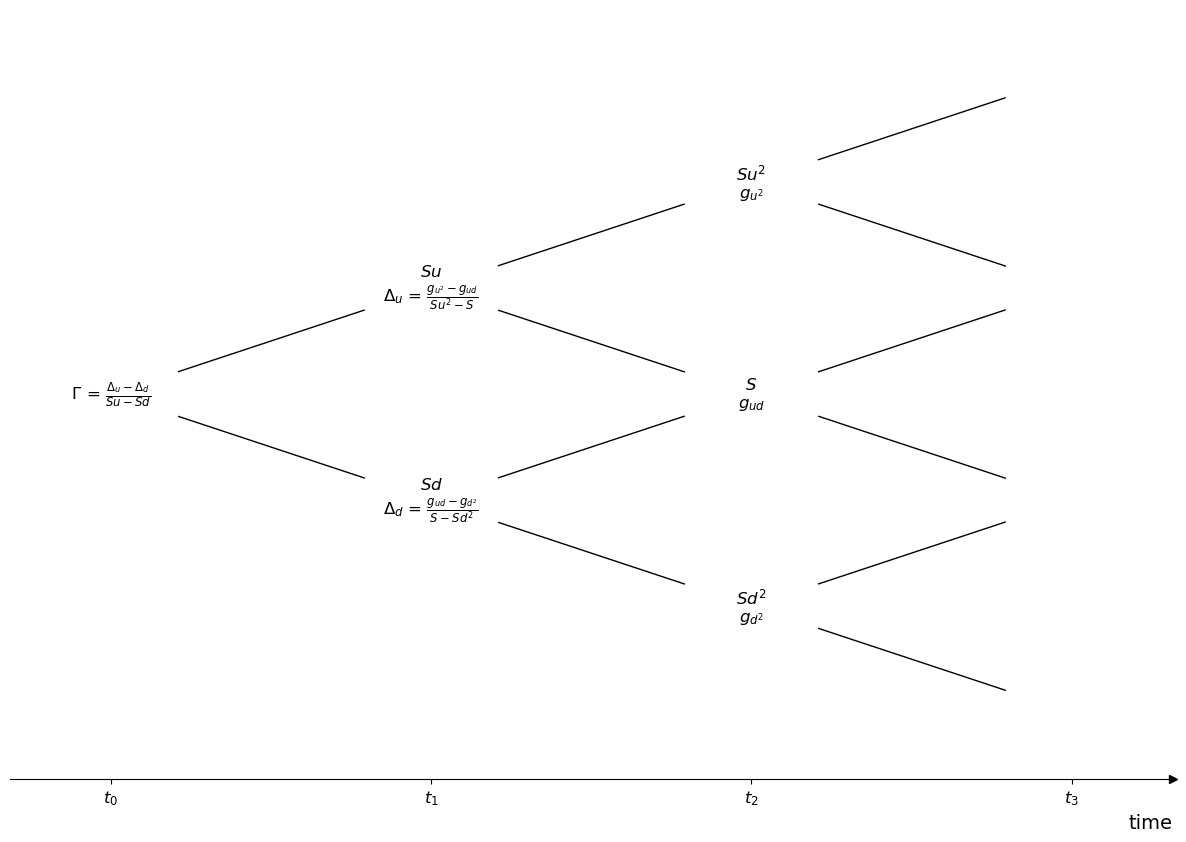

In [21]:
asset = AssetCRR(3)
sym_node_label = AssetCRR.sym_node_label
def sym_node_label_gamma(self, tn, jj, values):
    labels = []
    greek = lambda name: '$'+name+'_{' + self.node_label(jj, tn-jj) + '}$'
    if tn==0:
        Du = r'\Delta_{' + self.node_label(jj+1, tn-jj-1) + '}'
        Dd = r'\Delta_{' + self.node_label(jj-1, tn-jj+1) + '}'    
        G = r'$\frac{%s - %s}{Su - Sd}$'%(Du,Dd)
        labels = [greek(r'\Gamma')+' = '+G]
    if tn==1:
        labels.append(self.asset_node_label(tn, jj))
        gu = self.option_node_label(tn+1, jj+1, values[1])[1:-1]
        Su = self.asset_node_label(tn+1, jj+1)[1:-1]
        gd = self.option_node_label(tn+1, jj, values[1])[1:-1]
        Sd = self.asset_node_label(tn+1, jj)[1:-1]
        D = r'$\frac{%s - %s}{%s - %s}$'%(gu,gd,Su,Sd)
        labels.append(greek(r'\Delta')+' = '+D)
    if tn==2:
        return sym_node_label(self, tn, jj, values)
    return '\n'.join(labels)

if True:
    AssetCRR.sym_node_label = sym_node_label_gamma    
    fig, ax = asset.draw_tree(values=['S','g'], node_size=100**2)
    AssetCRR.sym_node_label = sym_node_label
else:
    fig, ax = asset.draw_tree(values=['S','g'])
df.savefig('discrete_time','fig_crr_gamma.pdf')

### Exercise 1

In [18]:
S = 122
K = 120
rf = 0.08
div = 0.00
T = 6/12
sigma = 0.25
n_steps = 3

def delta(S,V):
    return (V[1,1] - V[1,0]) / (S[1,1] - S[1,0])
    
def gamma(S,V):
    Delta_u = (V[2,2] - V[2,1]) / (S[2,2] - S[2,1])
    Delta_d = (V[2,1] - V[2,0]) / (S[2,1] - S[2,0])
    return (Delta_u - Delta_d) / (S[1,1] - S[1,0])

# American call
tree, _, C, _, _ = option_price(S,K,rf,div,T,sigma,n_steps,True)
print('The American call is worth',C[0,0])

# American put
_, _, P, _, _ = option_price(S,K,rf,div,T,sigma,n_steps,False)
print('The American put is worth',P[0,0])

print('Their deltas are', delta(tree.values,C), delta(tree.values,P))

print('Their gammas are', gamma(tree.values,C), gamma(tree.values,P))

The American call is worth 12.763390842063346
The American put is worth 6.385373522582933
Their deltas are 0.6413777541510127 -0.38753209567520047
Their gammas are 0.019278282867601807 0.022106658159714725


### Exercise 2

In [19]:
# Using the Jarrow and Rudd tree instead
jr_tree = AssetJarrowRudd(n_steps, S, rf, div, T, sigma)
_, C, _, _ = jr_tree.option_price(K, True)
print('The American call is worth',C[0,0])

_, P, _, _ = jr_tree.option_price(K, False)
print('The American put is worth',P[0,0])

print('Their deltas are', delta(tree.values,C), delta(tree.values,P))

print('Their gammas are', gamma(tree.values,C), gamma(tree.values,P))

The American call is worth 12.625030093516273
The American put is worth 6.30973043121608
Their deltas are 0.6658345719774386 -0.37372129423367234
Their gammas are 0.01945328255823015 0.022280035493638575
